## Handwritten Image Detection with Keras using MNIST and Fashion MNIST data

In this exercise we will work with image data: specifically the famous MNIST and Fashion MNIST data sets.  MNIST data set contains 70,000 images of handwritten digits in grayscale (0=black, 255 = white). Fashion MNIST data set contains 70,000 images of clothing in grayscale (0=black, 255 = white). All the images are 28 pixels by 28 pixels for a total of 784 pixels.  This is quite small by image standards.  Also, the images are well centered and isolated.  This makes this problem solvable with standard fully connected neural nets without too much pre-work. <br><br>
We will use a Convolutional Neural Network and compare it with a linear neural network. 

In the first part of this notebook, we will walk you through loading in the data, building a network, and training it.  Then it will be your turn to try different models and see if you can improve performance

In [41]:
# Preliminaries

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
import keras.layers as layers
from keras.optimizers import RMSprop, Adam
from keras.datasets import fashion_mnist

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's explore the dataset a little bit

In [4]:
# Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
#Let's just look at a particular example to see what is inside

x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
# What is the corresponding label in the training set?
y_train[333]

8

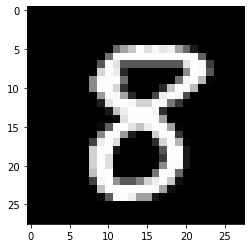

In [8]:
# Let's see what this image actually looks like

plt.imshow(x_train[333], cmap='Greys_r')

In [9]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [10]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255


In [11]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [12]:
# We will build a model with two hidden layers of size 512
# Fully connected inputs at each layer
# We will use dropout of .2 to help regularize
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))

In [13]:
## Note that this model has a LOT of parameters
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Let's compile the model
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization 
# of the loss function we had in binary classification case, to multi class case

In [15]:
# And now let's fit.

batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 1s 16us/step - loss: 0.5058 - accuracy: 0.8497 - val_loss: 0.2075 - val_accuracy: 0.9366
Epoch 2/30
60000/60000 [==============================] - 1s 14us/step - loss: 0.2503 - accuracy: 0.9260 - val_loss: 0.1552 - val_accuracy: 0.9545
Epoch 3/30
60000/60000 [==============================] - 1s 14us/step - loss: 0.2003 - accuracy: 0.9416 - val_loss: 0.1327 - val_accuracy: 0.9618
Epoch 4/30
60000/60000 [==============================] - 1s 14us/step - loss: 0.1761 - accuracy: 0.9482 - val_loss: 0.1193 - val_accuracy: 0.9648
Epoch 5/30
60000/60000 [==============================] - 1s 15us/step - loss: 0.1561 - accuracy: 0.9545 - val_loss: 0.1074 - val_accuracy: 0.9675
Epoch 6/30
60000/60000 [==============================] - 1s 14us/step - loss: 0.1432 - accuracy: 0.9582 - val_loss: 0.1073 - val_accuracy: 0.9689
Epoch 7/30
60000/60000 [==============================] - 1s 15us/st

In [16]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10280351581518189
Test accuracy: 0.9769999980926514


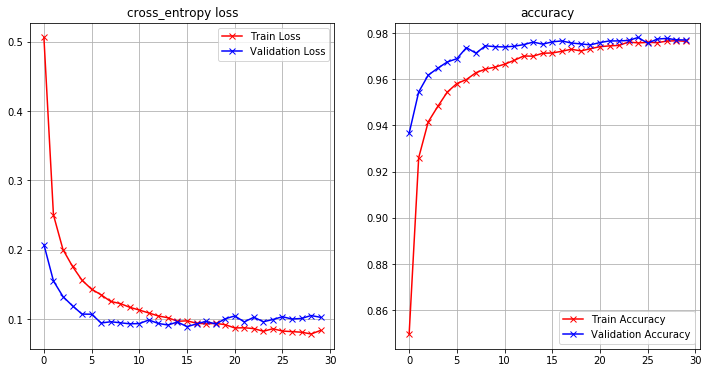

In [17]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

This is reasonably good performance, but we can do even better!  Next you will build an even bigger network and compare the performance.

### Keras Layers for CNNs
- Previously we built Neural Networks using primarily the Dense, Activation and Dropout Layers.

- Here we will describe how to use some of the CNN-specific layers provided by Keras

#### Conv2D

```python
keras.layers.convolutional.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
```

A few parameters explained:
- `filters`: the number of filter used per location.  In other words, the depth of the output.
- `kernel_size`: an (x,y) tuple giving the height and width of the kernel to be used
- `strides`: and (x,y) tuple giving the stride in each dimension.  Default is `(1,1)`
- `input_shape`: required only for the first layer

Note, the size of the output will be determined by the kernel_size, strides

#### MaxPooling2D
`keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)`

- `pool_size`: the (x,y) size of the grid to be pooled.
- `strides`: Assumed to be the `pool_size` unless otherwise specified

#### Flatten
Turns its input into a one-dimensional vector (per instance).  Usually used when transitioning between convolutional layers and fully connected layers.


# Exercise
### Build your own CNN model
Use the Keras "Sequential" functionality to build a convolutional neural network `model_2` with the following specifications:
<br>
<br>
Model Architecture:<br>
We will build the famous LeNet-5 architecutre and measure its performance.
<br>
    Convolution -> Relu -> Max pooling -> Convolution -> Relu -> Max pooling -> FC1 -> Relu -> FC2 -> Output(SoftMax)
<br>

1. Convolution1 kernel size: 5(H) x 5(W) x 6(filters), stride = 1, no padding
2. Max pooling1 kernel size: 2(H) x 2(W), stride = 2
3. Convolution2 kernel size: 5(H) x 5(W) x 16(filters), stride = 1, no padding
4. Max pooling2 kernel size: 2(H) x 2(W), stride = 2
5. Fully Connected1 size: 120
6. Fully Connected1 size: 84
7. How many parameters does your model have?  How does it compare with the previous model?
8. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
9. Plot the loss and accuracy graph for training the new model 
10. Evaluate the model on test data

To use the LeNet model, we need to do some preprocessing of the data first.

In [18]:
# Data is currently flattened i.e. m X 784, we need to reshape it back to 28 * 28. To do that we reshape the data.

x_train = np.reshape(x_train, [-1, 28, 28])
x_test = np.reshape(x_test, [-1, 28, 28])
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [19]:
# LeNet requires input of 32 X 32. So, we will pad the train and test images with zeros to increase the size to 32 X 32.

x_train=np.pad(x_train, ((0,0), (2,2), (2, 2)), 'constant')
x_test=np.pad(x_test, ((0,0), (2,2), (2, 2)), 'constant')
x_train.shape, x_test.shape

((60000, 32, 32), (10000, 32, 32))

In [20]:
# Convolutional model requires input to be of 3 dimensions. We will add a channel dimension to it.

x_train = np.reshape(x_train, [-1, 32, 32, 1])
x_test = np.reshape(x_test, [-1, 32, 32, 1])
x_train.shape, x_test.shape

((60000, 32, 32, 1), (10000, 32, 32, 1))

Write your model below

In [23]:
model_2 = Sequential()
#Layer1
#Conv Layer
model_2.add(Conv2D(filters=6,
                 kernel_size=(5,5),
                 strides=1,
                 activation='relu'))

#Pooling Layer
model_2.add(MaxPooling2D(pool_size=(2,2),strides=2))
#Layer2
#Conv Layer 2
model_2.add(Conv2D(filters=16,
                kernel_size=(5,5),
                strides=1,
                activation='relu'))
#Pooling Layer 2
model_2.add(MaxPooling2D(pool_size=(2,2), strides=2))
#Flatten
model_2.add(Flatten())
#Layer 3
#Fully connected layer 1
model_2.add(Dense(units=120, activation='relu'))
#Layer 4
#Fully connected layer 2
model_2.add(Dense(units=84,activation='relu'))
#Layer 5
#Output Layer
model_2.add(Dense(units=10, activation='softmax'))
model_2.compile(optimizer=RMSprop(lr=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
epochs=20
history = model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model_2.summary()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 129us/step - loss: 0.2570 - accuracy: 0.9221 - val_loss: 0.0679 - val_accuracy: 0.9788
Epoch 2/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.0676 - accuracy: 0.9793 - val_loss: 0.0680 - val_accuracy: 0.9801
Epoch 3/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.0449 - accuracy: 0.9862 - val_loss: 0.0391 - val_accuracy: 0.9859
Epoch 4/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.0351 - accuracy: 0.9889 - val_loss: 0.0305 - val_accuracy: 0.9895
Epoch 5/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.0281 - accuracy: 0.9911 - val_loss: 0.0315 - val_accuracy: 0.9896
Epoch 6/20
60000/60000 [==============================] - 8s 137us/step - loss: 0.0226 - accuracy: 0.9925 - val_loss: 0.0386 - val_accuracy: 0.9895
Epoch 7/20
60000/60000 [==============================] - 8s 1

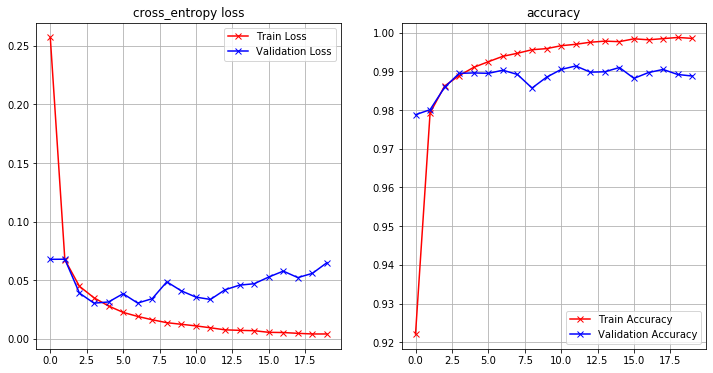

In [24]:


def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

## Think about the following questions

1) How do model_1 and model_2 compare?  Which do you prefer?  If you were going to put one into production, which would you choose and why?

2) Compare the trajectories of the loss function on the training set and test set for each model?  How do they compare?  What does that suggest about each model?  Do the same for accuracy?  Which do you think is more meaningful, the loss or the accuracy?

In [ ]:
# model_2 is not only more accurate than model_1 but it also has signifigantly less paramters. The trade off is that since 
# model_2 has more layers and is more complicated it takes longer to train it. While it does take longer to trade this model
# (model_2) would be far better for production due ot the greater accuracy and the less parameters needed.

In [ ]:
# While both models have similiar trajectories for cross_entropy_loss it is clear that model_2 can more easily suffer from 
# overfitting. 

# Accuracy follows the same general trend, however seems less prone to overfitting
#loss is more meaningful for the training process to find the best paramater value, however accuracy is more meaningful
#from an applied perspective (how does the model actually fair in prediciting data)

# Fashion MNIST
We will do the similar things for Fashion MNIST dataset. Fashion MNIST has 10 categories of clothing items:<br>

| Label | Description | 
| --- | --- | 
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [25]:
# Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [26]:
x_train[0].shape

(28, 28)

In [27]:
#Let's just look at a particular example to see what is inside

x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
         42,  92,  71, 107,  33,   0,   3,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,  23,
        145,   0,   0,   0, 113,  20,   0,   3,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  89,
          8,   0,  10,   0,  36, 104,   0,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  37,  97,
          0,   5,   1,   0,   0, 141,  23,   0,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   0,  70,  75,
          0,   6,   1,   0,   0, 141,  56,   0,   5,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  85,  57,
          0,   5,   1,   1,   0, 126,  62,   0,   6,   0,   0,   0,   0,
          0,   0],
       [  

In [28]:
# What is the corresponding label in the training set?
y_train[333]

8

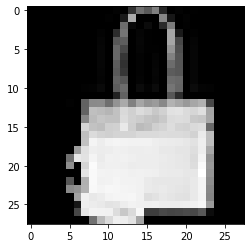

In [29]:
# Let's see what this image actually looks like

plt.imshow(x_train[333], cmap='Greys_r')

In [30]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [31]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255

In [32]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

## Reperforming the earlier preprocessing methods

In [33]:
# Data is currently flattened i.e. m X 784, we need to reshape it back to 28 * 28. To do that we reshape the data.

x_train = np.reshape(x_train, [-1, 28, 28])
x_test = np.reshape(x_test, [-1, 28, 28])
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [34]:
# LeNet requires input of 32 X 32. So, we will pad the train and test images with zeros to increase the size to 32 X 32.

x_train=np.pad(x_train, ((0,0), (2,2), (2, 2)), 'constant')
x_test=np.pad(x_test, ((0,0), (2,2), (2, 2)), 'constant')
x_train.shape, x_test.shape

((60000, 32, 32), (10000, 32, 32))

In [35]:
# Convolutional model requires input to be of 3 dimensions. We will add a channel dimension to it.

x_train = np.reshape(x_train, [-1, 32, 32, 1])
x_test = np.reshape(x_test, [-1, 32, 32, 1])
x_train.shape, x_test.shape

((60000, 32, 32, 1), (10000, 32, 32, 1))

Build a similar convolutional model with a differnet structure, learning rate or number of epochs, etc. that you think will result in a good model for this dataset.

In [47]:
# write your model here.
model = Sequential()
model.add(Conv2D(filters=65,kernel_size=(2,2),strides=1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32,kernel_size=(2,2),strides=1,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer=RMSprop(lr=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
epochs=10
batch_size=64
history = model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.summary()

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 184us/step - loss: 0.5462 - accuracy: 0.8186 - val_loss: 0.4540 - val_accuracy: 0.8324
Epoch 2/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.3318 - accuracy: 0.8815 - val_loss: 0.3650 - val_accuracy: 0.8725
Epoch 3/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.2922 - accuracy: 0.8947 - val_loss: 0.3291 - val_accuracy: 0.8858
Epoch 4/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.2683 - accuracy: 0.9021 - val_loss: 0.3054 - val_accuracy: 0.8932
Epoch 5/10
60000/60000 [==============================] - 12s 196us/step - loss: 0.2521 - accuracy: 0.9086 - val_loss: 0.2989 - val_accuracy: 0.8957
Epoch 6/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.2405 - accuracy: 0.9126 - val_loss: 0.3208 - val_accuracy: 0.8834
Epoch 7/10
60000/60000 [==============================] 

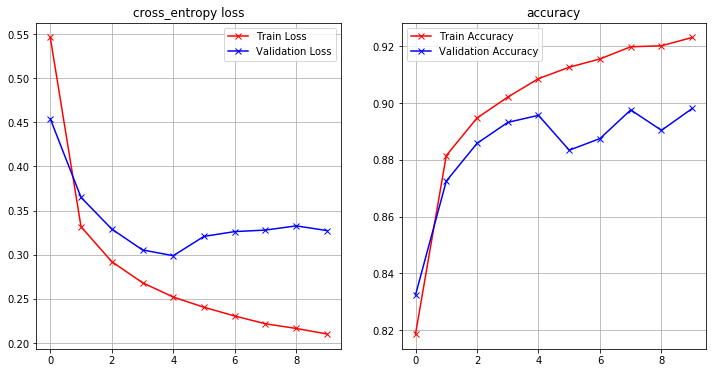

In [49]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)